<a href="https://colab.research.google.com/github/nicola-1999/DataScience/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# ## CNN model
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_auc_score

# # Convert the data to numpy arrays
# X_train = train_data.drop(columns=['Machine failure']).values
# Y_train = train_data['Machine failure'].values

# # Define the neural network architecture
# model = keras.Sequential([
#     keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy')

# # Initialize lists to store ROC AUC scores
# roc_auc_scores = []

# # Perform 10-fold cross-validation
# for iteration in range(1, 6):
#     i=0
#     print(f'\nIteration {iteration} started...')
#     kf = KFold(n_splits=10, shuffle=True, random_state=iteration)

#     for train_idx, test_idx in kf.split(X_train):
#         i=i+1
#         X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
#         Y_train_fold, Y_test_fold = Y_train[train_idx], Y_train[test_idx]

#         # Train the model
#         model.fit(X_train_fold, Y_train_fold, epochs=10, verbose=0)

#         # Make predictions
#         nn_pred = model.predict(X_test_fold).flatten()

#         # Calculate ROC AUC score
#         roc_auc = roc_auc_score(Y_test_fold, nn_pred)
#         roc_auc_scores.append(roc_auc)

#         print(f'Iteration {iteration} is running! ROC AUC value for cv - {i} : {roc_auc:.5f}')

# # Calculate average ROC AUC score
# avg_roc_auc = np.mean(roc_auc_scores)
# avg_roc_auc_cnn = avg_roc_auc
# print(f'\nUsing CNN Model: The average ROC AUC after 10 fold cv is: {avg_roc_auc:.5f}')

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**pclass**: A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. <br> If the age is estimated, is it in the form of xx.5


**sibsp**: The dataset defines family relations in this way...<br>

**Sibling** = brother, sister, stepbrother, stepsister
Spouse = husband,<br> wife (mistresses and fiancés were ignored)<br>
**parch**: The dataset defines family relations in this way...<br>
* Parent = mother, father<br>
* Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

In [100]:
train_df = pd.read_csv('train.csv')#, index_col = 'PassengerId')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
test_df = pd.read_csv('test.csv')#, index_col = 'PassengerId')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
test_idx = test_df['PassengerId']

In [103]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
def cleaning_data(data):
  data = data.drop(["Ticket","Cabin","PassengerId"], axis = 1) #Name
  data["Age"].fillna(data["Age"].mean(), inplace = True)
  data["Fare"].fillna(data["Fare"].mean(), inplace = True)
  data["Embarked"].fillna("U",inplace = True)
  return data

In [106]:
train = cleaning_data(train_df)
test = cleaning_data(test_df)

In [107]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Name column analysis

 Inspired by [LEONARDO FERREIRA](https://www.kaggle.com/code/kabure/titanic-eda-model-pipeline-keras-nn)

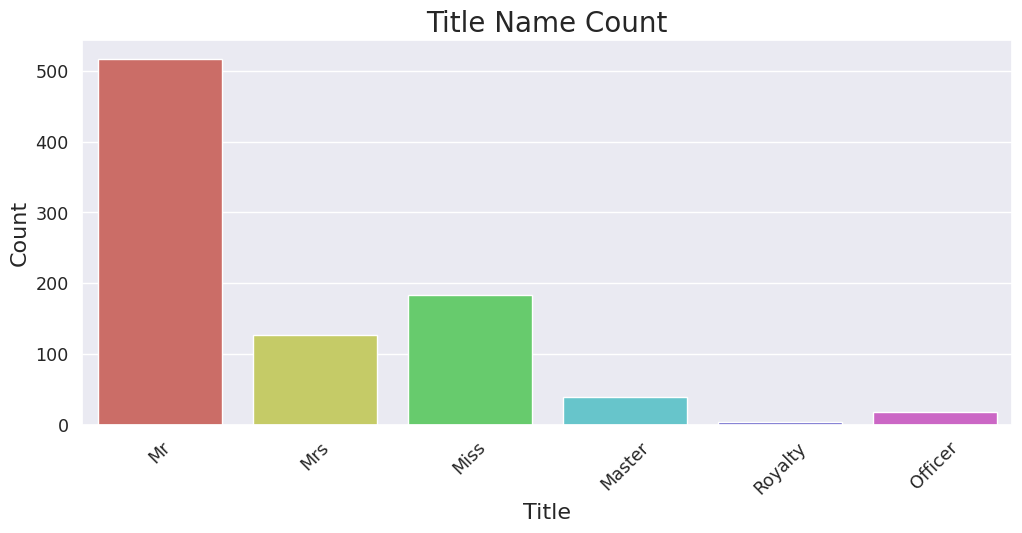

In [108]:
import re
#GettingLooking the prefix of all Passengers
train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
test['Title']  = test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }

# we map each title to correct category
train['Title'] = train.Title.map(Title_Dictionary)
test['Title'] = test.Title.map(Title_Dictionary)


#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [109]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [110]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Officer
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


<Axes: xlabel='Sex', ylabel='count'>

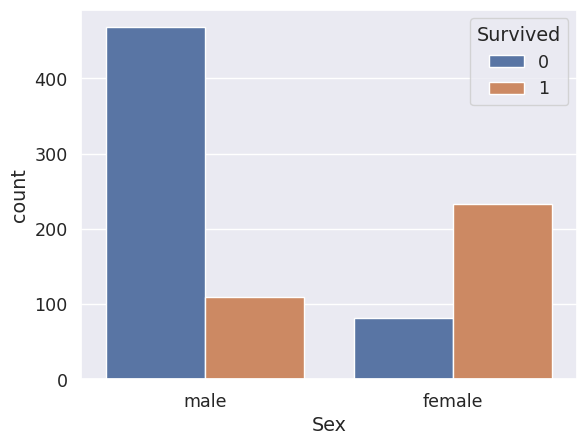

In [111]:
sns.countplot( data = train, x = 'Sex', hue = "Survived")

<Axes: xlabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


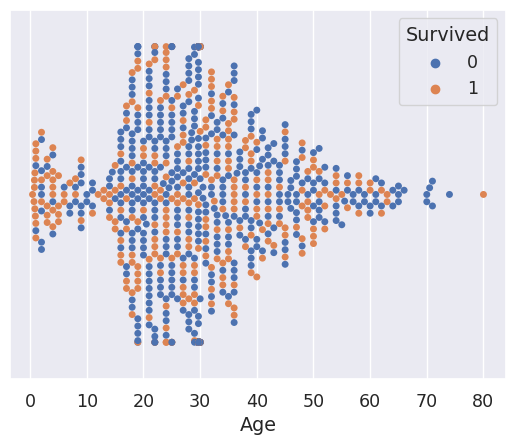

In [112]:
sns.swarmplot( data = train, x = 'Age', hue = "Survived")

In [113]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked",'Title'] #Title

for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])
  print(le.classes_)

['female' 'male']
['C' 'Q' 'S' 'U']
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty' nan]


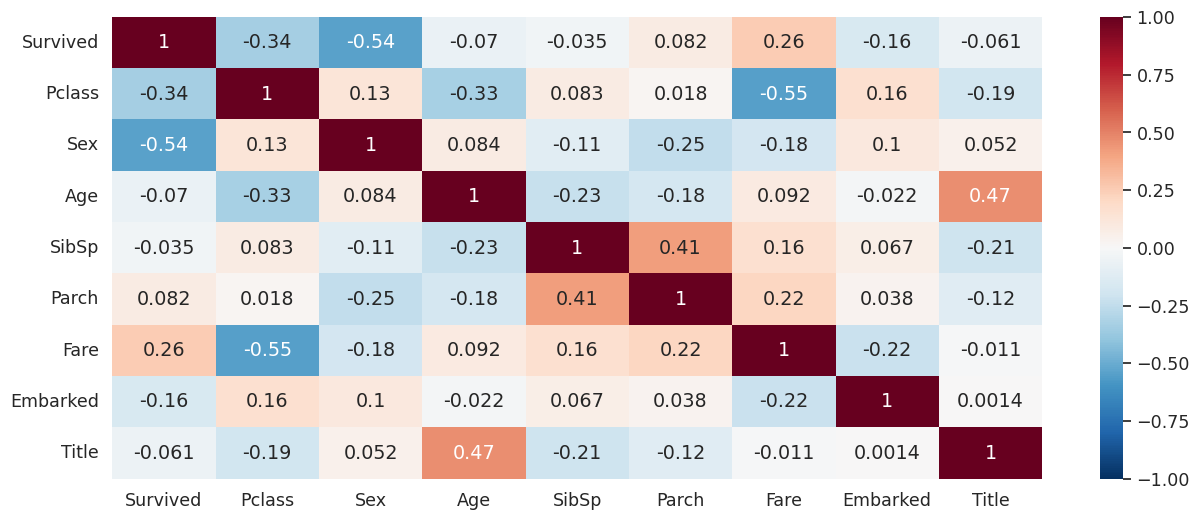

In [114]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,6))
sns.heatmap(
    train.corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [116]:
y = train["Survived"]
X = train.drop("Survived", axis = 1)

x_train,x_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Logist Regression

It is a special case of the regression analysis and is calculated when <br> the dependent variable is nominally or ordinally scaled.<br>

The goal of logistic regression is to estimate the probability <br>of occurence, not the value of the varaible itself (like linear regression).

In [117]:
clf = LogisticRegression(random_state=0, max_iter = 1000).fit(x_train, y_train)
preds = clf.predict(x_val)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))
print("Standard Deviation of Cross-Validation Scores:", np.std(cross_val_scores))


print("Accuracy score :", np.round(accuracy_score(y_val, preds),4))

Cross-Validation Scores: [0.81818182 0.81118881 0.78873239 0.73239437 0.8028169 ]
Mean Cross-Validation Score: 0.790662858268492
Standard Deviation of Cross-Validation Scores: 0.030741738798541116
Accuracy score : 0.8101


# Random Forest

In [118]:
from scipy.sparse import data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state = 42).fit(x_train, y_train)
preds2 = rf.predict(x_val)

cross_val_scores = cross_val_score(rf, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))
print("Standard Deviation of Cross-Validation Scores:", np.std(cross_val_scores))

print("Accuracy score :", np.round(accuracy_score(y_val, preds2),4))

Cross-Validation Scores: [0.7972028  0.77622378 0.82394366 0.77464789 0.79577465]
Mean Cross-Validation Score: 0.7935585541219343
Standard Deviation of Cross-Validation Scores: 0.017886051558588138
Accuracy score : 0.8492


In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [70, 100, 150],
    'max_depth' : [None,3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'random_state' : [None, 0,42]
                }
randomForest_CV = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 3)
randomForest_CV.fit(x_train, y_train)
print(randomForest_CV.best_params_)

# Print the best score
print(randomForest_CV.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150, 'random_state': 42}
0.8385100875793355


# Plot ROC

In [120]:
from sklearn.metrics import roc_auc_score,roc_curve

def plot_ROC(y_val, y_pred_proba) :
  fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
  auc = roc_auc_score(y_val, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

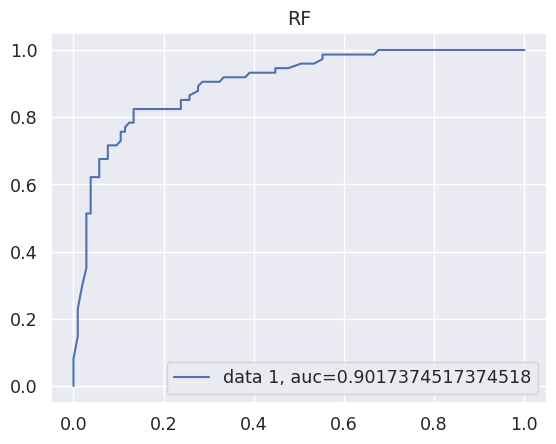

In [121]:
y_pred_proba = rf.predict_proba(x_val)[::,1]
plt.title('RF')
plot_ROC(y_val, y_pred_proba)

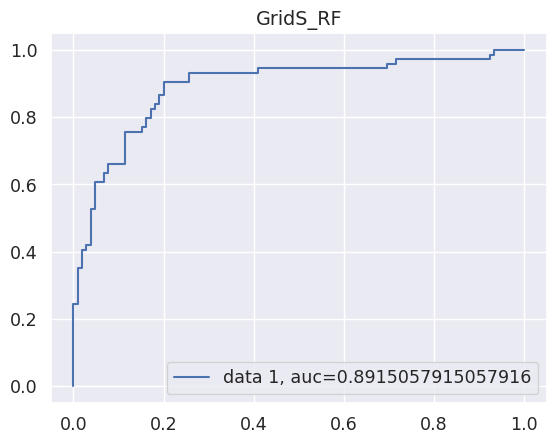

In [122]:
y_pred_proba = randomForest_CV.best_estimator_.predict_proba(x_val)[::,1]
plt.title('GridS_RF')
plot_ROC(y_val, y_pred_proba)

# Convolutional Neural Network

In [123]:
import matplotlib.pyplot as plt

def plot_loss(history,model):
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  #plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  plt.show()
  #plt.savefig(model+'_'+x+'.pdf')

In [124]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv1D,MaxPooling1D,Dropout,Flatten,Dense,BatchNormalization

In [125]:
# model = Sequential()
# model.add(Dense(16, input_shape = (X.shape[1],1), activation = "relu"))
# #model.add(BatchNormalization())
# model.add(Dropout(0.25))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.25))
# model.add(Dense(32, activation="relu"))

# model.add(Dense(1, activation = "sigmoid"))

# model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics = "accuracy")
# print(model.summary())

In [126]:
model = keras.models.Sequential()
model.add(Conv1D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(X.shape[1],1)))
model.add(Conv1D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(Conv1D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu'))
# # model.add(Conv1D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=0.3), metrics = "accuracy")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 8, 32)             96        
                                                                 
 conv1d_5 (Conv1D)           (None, 8, 32)             2080      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 4, 16)             1040      
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 16)             528       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 4, 16)            0         
 1D)                                                  

Epoch 1/20
45/45 [==============================] - 2s 11ms/step - loss: 0.6440 - accuracy: 0.6278 - val_loss: 0.5876 - val_accuracy: 0.6034
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7612 - val_loss: 0.4716 - val_accuracy: 0.7765
Epoch 3/20
45/45 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8104 - val_loss: 0.4408 - val_accuracy: 0.8101
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8244 - val_loss: 0.4358 - val_accuracy: 0.8045
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8258 - val_loss: 0.4167 - val_accuracy: 0.8045
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4189 - accuracy: 0.8315 - val_loss: 0.4279 - val_accuracy: 0.8268
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8287 - val_loss: 0.4183 - val_accuracy: 0.8324
Epoch 8/20
45/45 [=

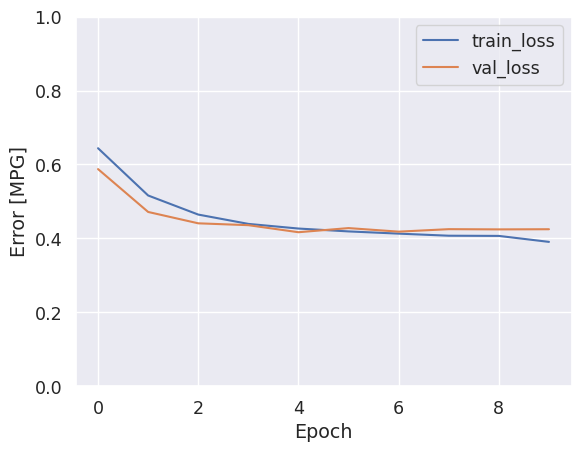

In [127]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X)
scaled_x = pd.DataFrame(data = scaled_array, columns = X.columns)

x_train,x_val,y_train,y_val = train_test_split(scaled_x,y, test_size = 0.2, random_state = 42, shuffle = True)


# # Perform 10-fold cross-validation
# for iteration in range(1, 6):
#     i=0
#     print(f'\nIteration {iteration} started...')
#     kf = KFold(n_splits=10, shuffle=True, random_state=iteration)

#     for train_idx, test_idx in kf.split(X_train):
#         i=i+1
#         X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
#         Y_train_fold, Y_test_fold = Y_train[train_idx], Y_train[test_idx]

#         # Train the model
#         model.fit(X_train_fold, Y_train_fold, epochs=10, verbose=0)

#         # Make predictions
#         nn_pred = model.predict(X_test_fold).flatten()

callbacks =[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]#patience in n° of epochs with no improvement
current_history = model.fit(x_train,y_train,  epochs=20,
                            batch_size=16,
                            validation_data=(x_val, y_val),
                            callbacks=callbacks,
                            verbose=1)
plot_loss(current_history, model)

Epoch 1/20
36/36 [==============================] - 1s 17ms/step - loss: 0.4081 - accuracy: 0.8278 - val_loss: 0.4338 - val_accuracy: 0.8045
Epoch 2/20
36/36 [==============================] - 0s 10ms/step - loss: 0.3847 - accuracy: 0.8489 - val_loss: 0.4247 - val_accuracy: 0.8212
Epoch 3/20
36/36 [==============================] - 1s 14ms/step - loss: 0.3824 - accuracy: 0.8278 - val_loss: 0.4244 - val_accuracy: 0.8268
Epoch 4/20
36/36 [==============================] - 0s 13ms/step - loss: 0.3831 - accuracy: 0.8366 - val_loss: 0.4151 - val_accuracy: 0.8380
Epoch 5/20
36/36 [==============================] - 1s 16ms/step - loss: 0.3844 - accuracy: 0.8559 - val_loss: 0.4292 - val_accuracy: 0.8156
Epoch 6/20
36/36 [==============================] - 1s 15ms/step - loss: 0.3794 - accuracy: 0.8576 - val_loss: 0.4336 - val_accuracy: 0.8156
Epoch 7/20
36/36 [==============================] - 1s 15ms/step - loss: 0.3849 - accuracy: 0.8436 - val_loss: 0.4253 - val_accuracy: 0.8380
Epoch 8/20
36

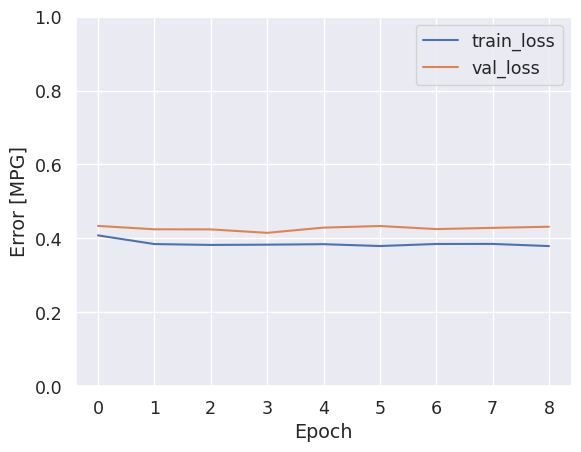

Epoch 1/20
36/36 [==============================] - 1s 23ms/step - loss: 0.3719 - accuracy: 0.8576 - val_loss: 0.4296 - val_accuracy: 0.8101
Epoch 2/20
36/36 [==============================] - 1s 23ms/step - loss: 0.3678 - accuracy: 0.8594 - val_loss: 0.4293 - val_accuracy: 0.8268
Epoch 3/20
36/36 [==============================] - 1s 36ms/step - loss: 0.3575 - accuracy: 0.8489 - val_loss: 0.4346 - val_accuracy: 0.8101
Epoch 4/20
36/36 [==============================] - 1s 28ms/step - loss: 0.3656 - accuracy: 0.8489 - val_loss: 0.4346 - val_accuracy: 0.8101
Epoch 5/20
36/36 [==============================] - 0s 11ms/step - loss: 0.3610 - accuracy: 0.8541 - val_loss: 0.4495 - val_accuracy: 0.8101
Epoch 6/20
36/36 [==============================] - 0s 11ms/step - loss: 0.3580 - accuracy: 0.8612 - val_loss: 0.4443 - val_accuracy: 0.8156
Epoch 7/20
36/36 [==============================] - 0s 8ms/step - loss: 0.3539 - accuracy: 0.8541 - val_loss: 0.4492 - val_accuracy: 0.8045


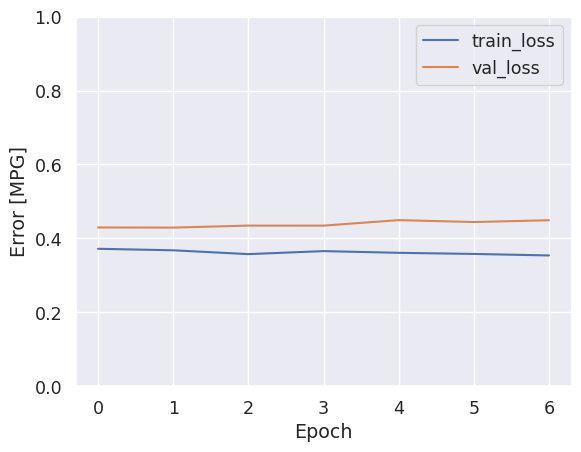

Epoch 1/20
36/36 [==============================] - 0s 13ms/step - loss: 0.3806 - accuracy: 0.8526 - val_loss: 0.4452 - val_accuracy: 0.8380
Epoch 2/20
36/36 [==============================] - 0s 13ms/step - loss: 0.3748 - accuracy: 0.8632 - val_loss: 0.4369 - val_accuracy: 0.8324
Epoch 3/20
36/36 [==============================] - 0s 10ms/step - loss: 0.3623 - accuracy: 0.8561 - val_loss: 0.4454 - val_accuracy: 0.8212
Epoch 4/20
36/36 [==============================] - 1s 15ms/step - loss: 0.3483 - accuracy: 0.8684 - val_loss: 0.4440 - val_accuracy: 0.8156
Epoch 5/20
36/36 [==============================] - 0s 9ms/step - loss: 0.3557 - accuracy: 0.8667 - val_loss: 0.4414 - val_accuracy: 0.8101
Epoch 6/20
36/36 [==============================] - 0s 8ms/step - loss: 0.3462 - accuracy: 0.8649 - val_loss: 0.4414 - val_accuracy: 0.8268
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.3673 - accuracy: 0.8579 - val_loss: 0.4323 - val_accuracy: 0.8212
Epoch 8/20
36/36

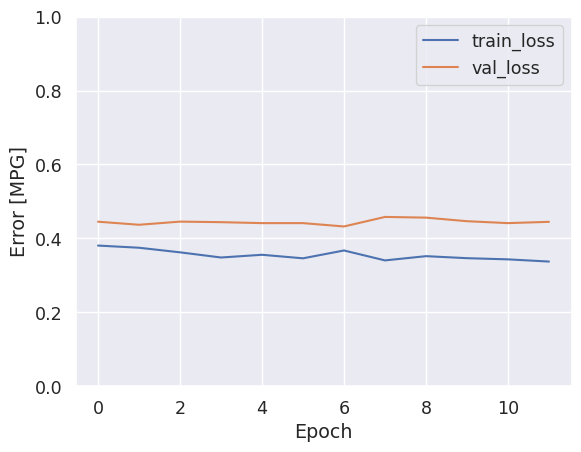

Epoch 1/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3589 - accuracy: 0.8561 - val_loss: 0.4520 - val_accuracy: 0.8156
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8509 - val_loss: 0.4612 - val_accuracy: 0.7933
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3565 - accuracy: 0.8526 - val_loss: 0.4501 - val_accuracy: 0.8268
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8561 - val_loss: 0.4485 - val_accuracy: 0.8268
Epoch 5/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8614 - val_loss: 0.4488 - val_accuracy: 0.8212
Epoch 6/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8561 - val_loss: 0.4575 - val_accuracy: 0.8045
Epoch 7/20
36/36 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8632 - val_loss: 0.4375 - val_accuracy: 0.8101
Epoch 8/20
36/36 [==

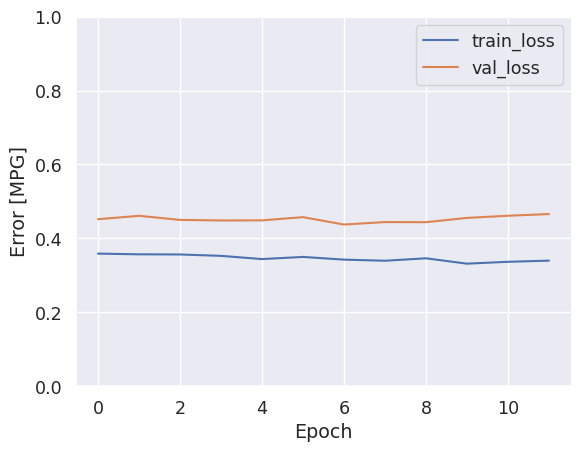

Epoch 1/20
36/36 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.8386 - val_loss: 0.4505 - val_accuracy: 0.8156
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3579 - accuracy: 0.8544 - val_loss: 0.4565 - val_accuracy: 0.8045
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3535 - accuracy: 0.8474 - val_loss: 0.4751 - val_accuracy: 0.8156
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8667 - val_loss: 0.4491 - val_accuracy: 0.8156
Epoch 5/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3563 - accuracy: 0.8596 - val_loss: 0.4595 - val_accuracy: 0.8268
Epoch 6/20
36/36 [==============================] - 0s 7ms/step - loss: 0.3528 - accuracy: 0.8509 - val_loss: 0.4543 - val_accuracy: 0.8268
Epoch 7/20
36/36 [==============================] - 0s 7ms/step - loss: 0.3470 - accuracy: 0.8579 - val_loss: 0.4516 - val_accuracy: 0.8156
Epoch 8/20
36/36 [==

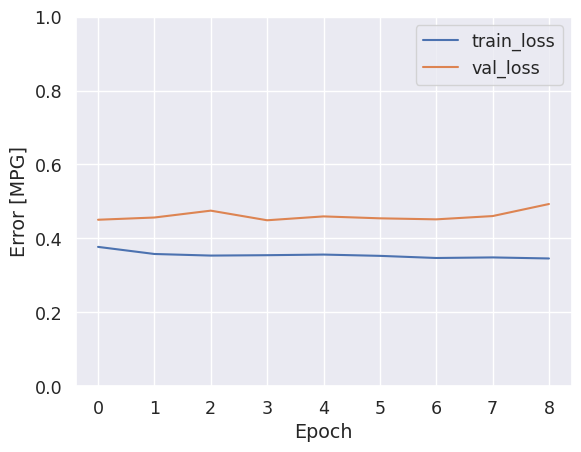

In [129]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X)
scaled_x = pd.DataFrame(data = scaled_array, columns = X.columns)

x_train,x_val,y_train,y_val = train_test_split(scaled_x,y, test_size = 0.2, random_state = 42, shuffle = True)

from sklearn.model_selection import KFold
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(x_train):
    x_train_fold, x_val_fold = x_train.iloc[train_idx], x_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the model
    callbacks =[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]#patience in n° of epochs with no improvement
    current_history = model.fit(x_train_fold,y_train_fold,  epochs=20,
                        batch_size=16,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks,
                        verbose=1)
    plot_loss(current_history, model)

    # Make predictions
    #nn_pred = model.predict(x_val_fold).flatten()

Epoch 1/20
36/36 [==============================] - 0s 10ms/step - loss: 0.3449 - accuracy: 0.8439 - val_loss: 0.4748 - val_accuracy: 0.8156
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8544 - val_loss: 0.4675 - val_accuracy: 0.8212
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.8632 - val_loss: 0.4892 - val_accuracy: 0.8212
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.3371 - accuracy: 0.8649 - val_loss: 0.4769 - val_accuracy: 0.8380
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8596 - val_loss: 0.4625 - val_accuracy: 0.8212
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8596 - val_loss: 0.5248 - val_accuracy: 0.7989
Epoch 7/20
36/36 [==============================] - 0s 5ms/step - loss: 0.3604 - accuracy: 0.8474 - val_loss: 0.5175 - val_accuracy: 0.8045
Epoch 8/20
36/36 [=

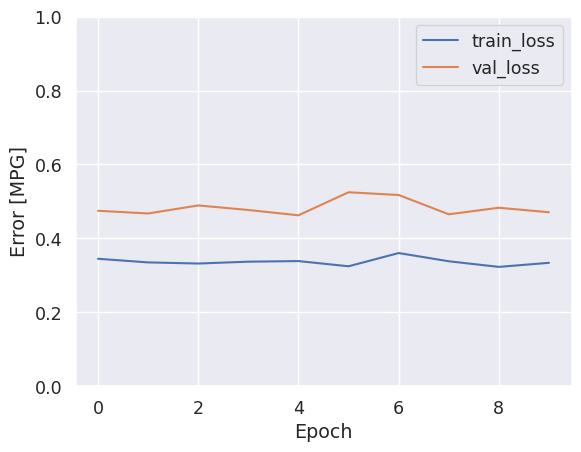

In [130]:
# Train the model
callbacks =[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]#patience in n° of epochs with no improvement
current_history = model.fit(x_train_fold,y_train_fold,  epochs=20,
                    batch_size=16,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks,
                    verbose=1)

plot_loss(current_history, model)

In [131]:
scaled_val = pd.DataFrame(columns = x_val.columns, data = scaler.transform(x_val))
predictions = model.predict(scaled_val)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int).flatten()
print(pd.Series(binary_predictions))

6/6 [==============================] - 0s 3ms/step
0      1
1      1
2      1
3      1
4      1
      ..
174    1
175    1
176    1
177    1
178    1
Length: 179, dtype: int64


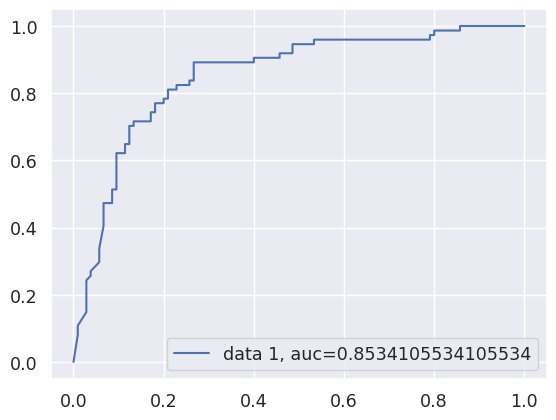

In [132]:
y_pred_proba = predictions
plot_ROC(y_val, y_pred_proba)

# Submission part

In [139]:
submission_preds = rf.predict(test)

In [140]:
df = pd.DataFrame(columns = ['PassengersId'], data = test_idx.values)
df['Survived'] = submission_preds
df.head()

,PassengersId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [141]:
df.to_csv("submission.csv", index=False)